Артамонов Кирилл, Б01-007

**Решение задачи №16**

Подключение необходимых библиотек:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Задаем условие задачи:

In [18]:
def f(L, h) :
    f = np.zeros((int(L / h['x']), int(L / h['y'])))
    f[:, 0]  = 1
    f[0, :]  = 2
    f[:, -1] = 3
    f[-1, :] = 4
    return f

Метод для построения графиков:

In [19]:
def plot(u, title):
    plt.title(title)
    plt.imshow(u)
    plt.show()

Реализуем итерационные методы:

In [20]:
def mthdJacobi(task, h, n_iterations):
    u = [0]
    u.append(task.copy())

    for i_iter in range(0, n_iterations):
        prev_u = u[-1]
        cur_u  = task.copy()
        for i in range(1, len(task[0, :]) - 1):
            for j in range(1, len(task[:, 0]) - 1):
                cur_u[i, j] = 1 / 2 / (h['x']**2 + h['y']**2) * \
                              (h['y']**2 * (prev_u[i+1, j] + prev_u[i-1, j]) + \
                               h['x']**2 * (prev_u[i, j+1] + prev_u[i, j-1]))
        u.append(cur_u)
    return u[n_iterations]

def mthdZeidel(task, h, n_iterations):
    u = [0]
    u.append(task.copy())

    for i_iter in range(0, n_iterations):
        prev_u = u[-1]
        cur_u  = task.copy()
        for i in range(1, len(task[0, :]) - 1):
            for j in range(1, len(task[:, 0]) - 1):
                cur_u[i, j] = 1 / 2 / (h['x']**2 + h['y']**2) * \
                                (h['y']**2 * (cur_u[i-1, j] + prev_u[i+1, j]) + \
                                 h['x']**2 * (cur_u[i, j-1] + prev_u[i, j+1]))
        u.append(cur_u)
    return u[n_iterations]

def mthdRelaxation(task, n_iterations, tau):

    u = [0]
    u.append(task.copy())

    for i_iter in range(0, n_iterations):
        prev_u = u[-1]
        cur_u  = task.copy()
        for i in range(1, len(task[0, :]) - 1):
            for j in range(1, len(task[:, 0]) - 1):
                cur_u[i, j] = tau / 4.0 * ( cur_u[i-1, j] +  cur_u[i, j-1]  + \
                                           prev_u[i+1, j] + prev_u[i, j+1]) - \
                              (tau - 1) *  prev_u[i, j]
        u.append(cur_u)
    return u[n_iterations]

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_solution(solution):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x, y = np.meshgrid(np.arange(solution.shape[0]), np.arange(solution.shape[1]))
    z = solution

    ax.plot_surface(x, y, z)
    plt.show()


Результаты:

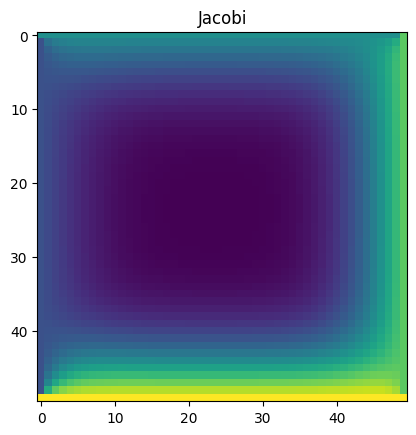

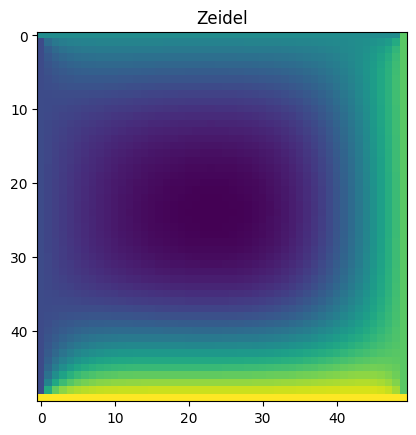

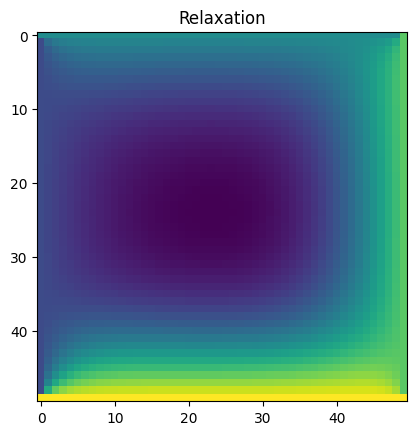

In [22]:
n_iterations = 100

L = 1
h = {'x' : 0.02, 'y': 0.02}

task = f(L, h)

u_jac = mthdJacobi     (task, h, n_iterations)
u_zei = mthdZeidel     (task, h, n_iterations)
u_rel = mthdRelaxation (task,    n_iterations, 1)

plot(u_jac, "Jacobi")
plot(u_zei, "Zeidel")
plot(u_rel, "Relaxation")

При h->0:

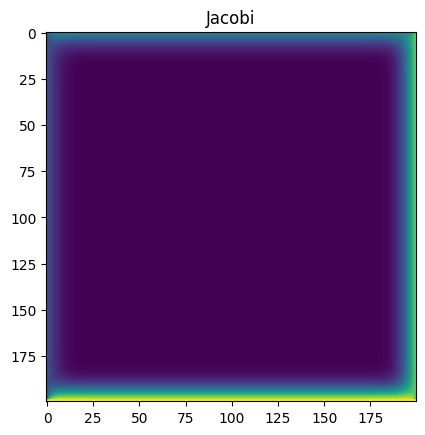

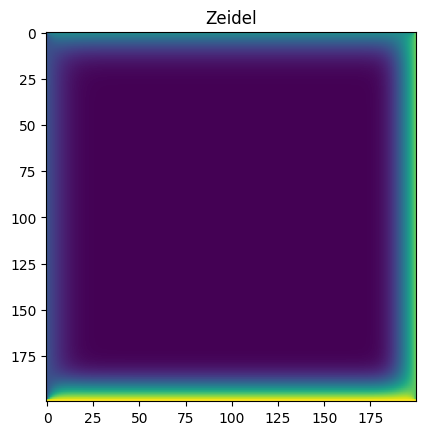

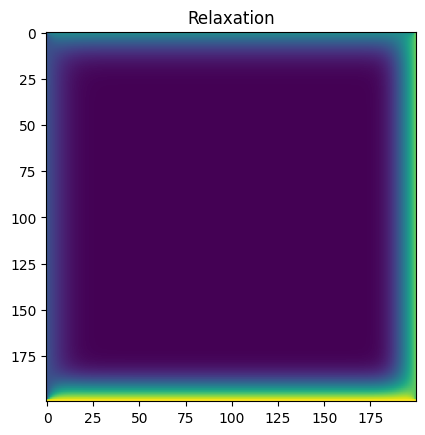

In [23]:

L = 1
h = {'x' : 0.005, 'y': 0.005}

task = f(L, h)

u_jac = mthdJacobi     (task, h, n_iterations)
u_zei = mthdZeidel     (task, h, n_iterations)
u_rel = mthdRelaxation (task,    n_iterations, 1)

plot(u_jac, "Jacobi")
plot(u_zei, "Zeidel")
plot(u_rel, "Relaxation")

Исследуем сходимость релаксации:

1.   Новый пункт
2.   Новый пункт



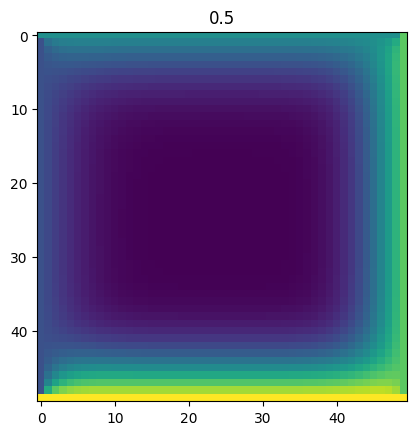

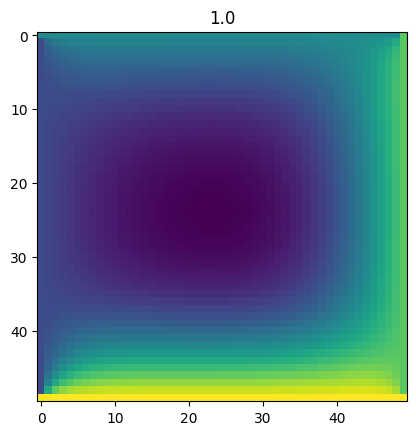

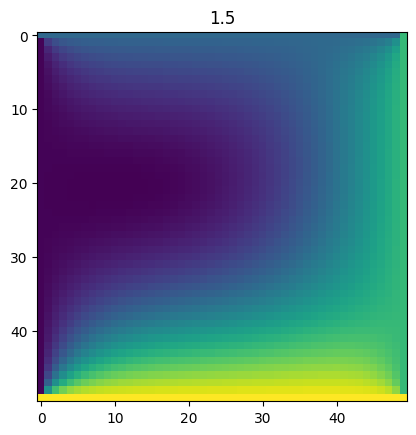

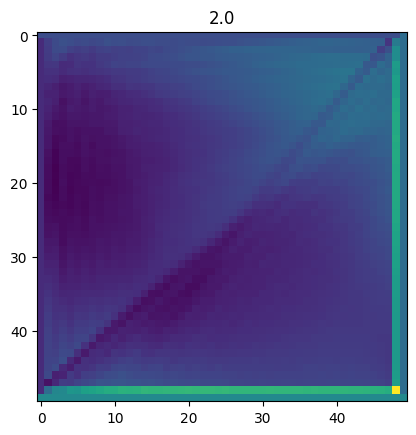

In [24]:
L = 1
h = {'x' : 0.02, 'y': 0.02}

task = f(L, h)

tau = 0.5
for i in range (4) :
    u_rel = mthdRelaxation(task, n_iterations, tau)
    plot(u_rel, tau)
    tau = tau + 0.5